<a href="https://colab.research.google.com/github/vitovicenti/Computer-Vision-Exercises/blob/main/2_Low_level_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Low level image processing**

# **Contrast enhancement of grayscale images**


Improve the contrast of these two images using:


* histogram equalization

* contrast stretching

Visualize the histogram of the improved images

*(Functions used in this code)*

In [ ]:
# print the histogram of a given image, with its title
def print_hist(c, title): 
  hist,bins = np.histogram(c.flatten(),256,[0,256])
  cdf = hist.cumsum()
  cdf_normalized = cdf * float(hist.max()) / cdf.max()
  plt.plot(cdf_normalized, color = 'blue')
  plt.title(title)
  plt.hist(c.flatten(),256,[0,256], color = 'gray')
  plt.xlim([0,256])
  plt.legend(('cdf','histogram'), loc = 'upper left')
  plt.show()

In [ ]:
# given an image improve it with the linear contrast stretching method
def lin_contrast_stretching(c):
  a = c.min()
  b = c.max()

  c.dtype, c.min(), c.max(), c.shape
  stretched = 255*((c-a)/(b-a))
  return stretched


**Histogram equalization**

**Image 1**

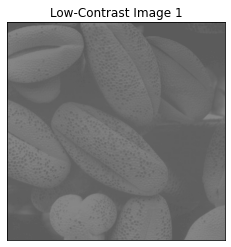

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = cv2.imread("Q2_1_1.tiff", cv2.IMREAD_COLOR)
imgplot = plt.imshow(img1)

plt.title('Low-Contrast Image 1', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 

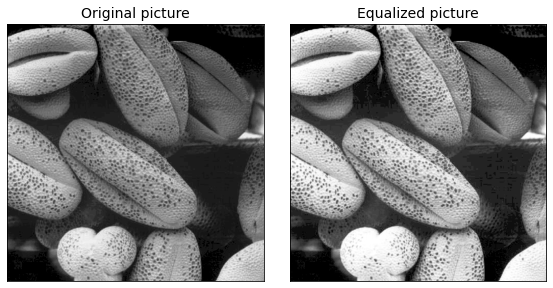

In [ ]:
gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
dst = cv2.equalizeHist(gray_img)

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(gray_img, 'gray')
ax[0].set_title('Original picture', fontsize=14, color='black')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(dst, 'gray')
ax[1].set_title('Equalized picture', fontsize=14)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

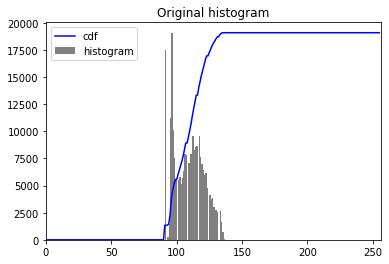

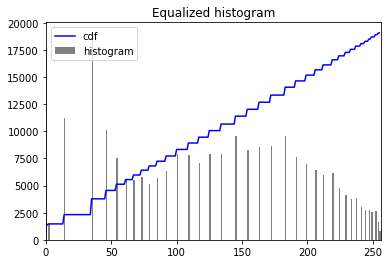

In [ ]:
print_hist(gray_img, 'Original histogram')
print_hist(dst,'Equalized histogram')

**Image 2**

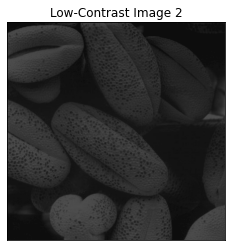

In [ ]:
img2 = cv2.imread("Q2_1_2.tiff", cv2.IMREAD_COLOR)

imgplot = plt.imshow(img2)
plt.title('Low-Contrast Image 2', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 

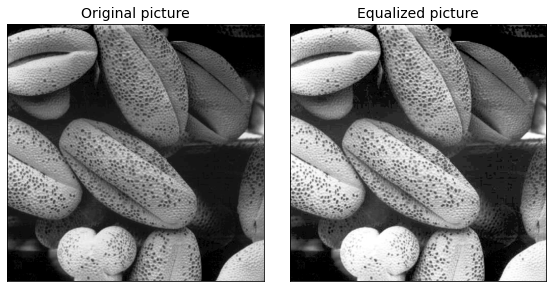

In [ ]:
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
dst2 = cv2.equalizeHist(gray_img2)

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(gray_img2, 'gray')
ax[0].set_title('Original picture', fontsize=14, color='black')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(dst2, 'gray')
ax[1].set_title('Equalized picture', fontsize=14)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

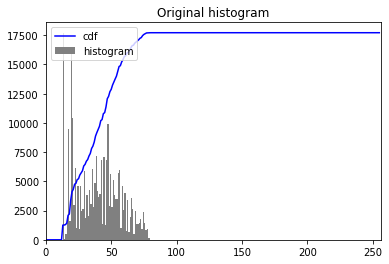

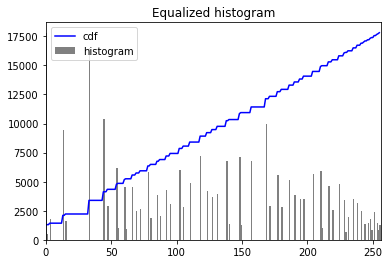

In [ ]:
print_hist(gray_img2, 'Original histogram')
print_hist(dst2,'Equalized histogram')

**Contrast Stretching**

**Image 1**

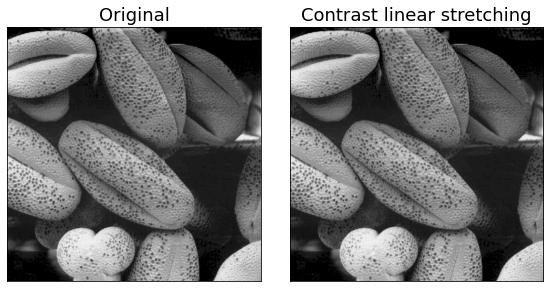

In [ ]:
contr_stretch_img = lin_contrast_stretching(gray_img)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(gray_img,'gray')
ax[0].set_title('Original', fontsize=18, color='black')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(contr_stretch_img,'gray')
ax[1].set_title('Contrast linear stretching', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

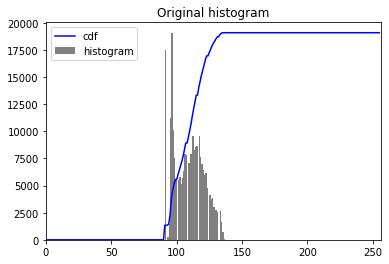

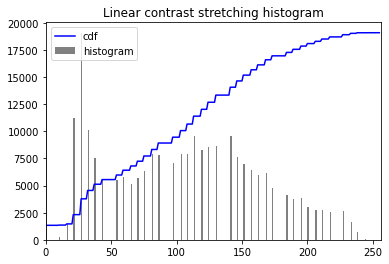

In [ ]:
print_hist(gray_img, 'Original histogram')
print_hist(contr_stretch_img,'Linear contrast stretching histogram')

**Image 2**

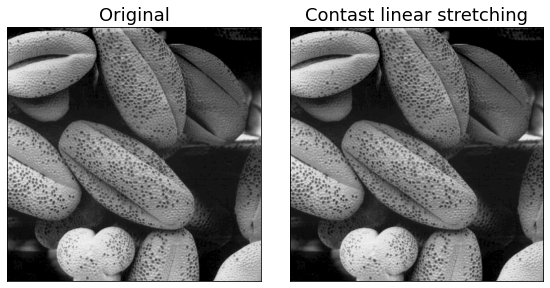

In [ ]:
contr_stretch_img2 = lin_contrast_stretching(gray_img2)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(gray_img2,'gray')
ax[0].set_title('Original', fontsize=18, color='black')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(contr_stretch_img2,'gray')
ax[1].set_title('Contast linear stretching', fontsize=18)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout();

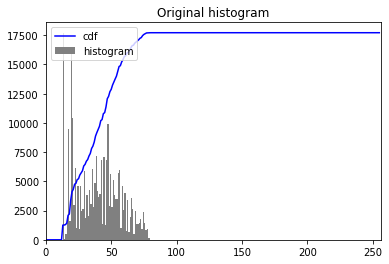

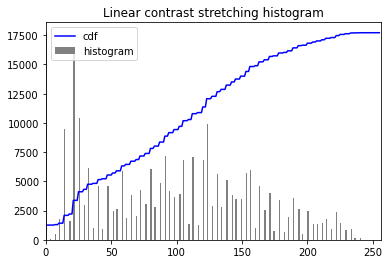

In [ ]:
print_hist(gray_img2, 'Original histogram')
print_hist(contr_stretch_img2,'Linear contrast stretching histogram')

# **Contrast enhancement of color images**

* Contrast stretching of color images is not a trivial generalization of what is discussed for grayscale images.


---

* Prove that simple contrast stretching of the Red, Green and Blue channels independently does not work well.

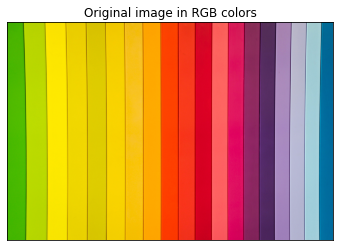

In [ ]:
img_bgr = cv2.imread("pic.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original image in RGB colors', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 

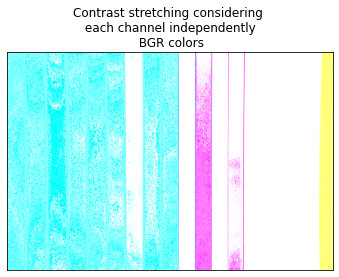

In [ ]:
b,g,r = cv2.split(img_bgr)

lin_b = lin_contrast_stretching(b)
lin_g = lin_contrast_stretching(g)
lin_r = lin_contrast_stretching(r)

stretched_img = cv2.merge([lin_b, lin_g, lin_r])

plt.imshow(stretched_img)

plt.title('Contrast stretching considering \n each channel independently \n BGR colors', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 

---
* A possible solution: First change the color model from RGB (or BGR) to HSV, then stretch the contrast in the V image and use the new V values together with the original H and S values to obtain the improved color image.

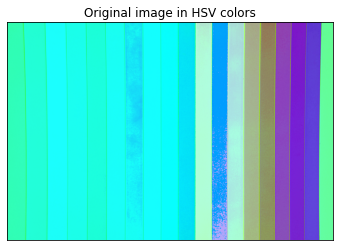

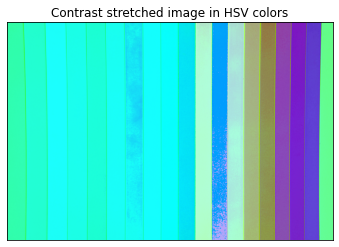

In [ ]:
hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(hsv)

lin_v = lin_contrast_stretching(v)

hsv_stretched = cv2.merge([h, s, lin_v.astype(np.uint8)]) # lin_v contained float64 data, while h and s are uint8

plt.imshow(hsv)
plt.title('Original image in HSV colors', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 

plt.imshow(hsv_stretched)
plt.title('Contrast stretched image in HSV colors', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 


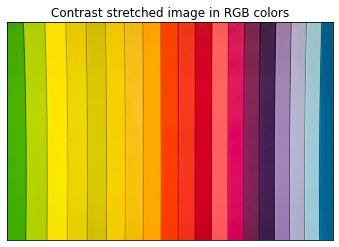

In [ ]:
lin_rgb_img = cv2.cvtColor(hsv_stretched, cv2.COLOR_HSV2RGB)
plt.imshow(lin_rgb_img)

plt.title('Contrast stretched image in RGB colors', fontdict={'fontsize':12, 'color':'black'})
plt.show(plt.xticks([]), plt.yticks([])) 